In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [2]:
df = pd.read_csv('./data/clean.csv')

In [3]:
df.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price,ambrane,boat,...,Leather,Metal,Nylon,Other,Plastic,Rubber,Silicon,Stainless Steel,Synthetic,Thermo Plastic Polyurethene
0,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727,-13200.000001,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091,-5991.000000,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000,-18200.000000,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091,-3400.000000,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091,-2500.000000,0,0,...,0,0,0,1,0,0,0,0,0,0


In [4]:
df.shape

(181, 201)

In [6]:
X = df.drop('Discount Price', axis=1)
y = df['Discount Price']  # Replace with your target column name


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% testing

In [11]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 6786886321.323678


In [17]:
# Create a linear regression model
model = LinearRegression()

In [19]:
# Perform 5-fold cross-validation with mean_squared_error as the scoring metric
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')  # Use neg_mean_squared_error as the scoring metric

# Convert the negative MSE scores to positive MSE scores
mse_scores = -scores

# Print the cross-validation MSE scores
print('Cross-validation MSE scores:', mse_scores)

# Print the average and standard deviation of the cross-validation MSE scores
print('Average cross-validation MSE score:', mse_scores.mean())
print('Standard deviation of cross-validation MSE scores:', mse_scores.std())

Cross-validation MSE scores: [5.01427688e+11 4.23635313e+06 1.54337455e+11 2.34688100e+13
 6.31326070e+10]
Average cross-validation MSE score: 4837542401942.293
Standard deviation of cross-validation MSE scores: 9317244195151.78


In [21]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
from sklearn.metrics import r2_score

In [25]:
# Create a decision tree regression model
model = DecisionTreeRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate and print the R2 score on the test data
r2 = r2_score(y_test, y_pred)
print('Test R2 score:', r2)

# Perform 5-fold cross-validation with R2 score as the scoring metric
scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # Use R2 score as the scoring metric

# Print the cross-validation R2 scores
print('Cross-validation R2 scores:', scores)

# Print the average and standard deviation of the cross-validation R2 scores
print('Average cross-validation R2 score:', scores.mean())
print('Standard deviation of cross-validation R2 scores:', scores.std())

Test R2 score: 0.8104998977421083
Cross-validation R2 scores: [ 0.43383353  0.39107379  0.11895769 -0.03697021 -0.08583517]
Average cross-validation R2 score: 0.16421192470341514
Standard deviation of cross-validation R2 scores: 0.21410645121185348


In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
# Create a Random Forest Regression model
model = RandomForestRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate and print the R2 score on the test data
r2 = r2_score(y_test, y_pred)
print('Test R2 score:', r2)

# Perform 5-fold cross-validation with R2 score as the scoring metric
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the cross-validation R2 scores
print('Cross-validation R2 scores:', scores)

# Print the average and standard deviation of the cross-validation R2 scores
print('Average cross-validation R2:', scores.mean())
print('Standard deviation of cross-validation R2:', scores.std())

Test R2 score: 0.5801217418686614
Cross-validation R2 scores: [0.47787533 0.69823176 0.4889784  0.56121539 0.77766748]
Average cross-validation R2: 0.6007936734820246
Standard deviation of cross-validation R2: 0.11828486120981774


In [30]:
import xgboost as xgb

In [31]:
# Create an XGBoost regression model
model = xgb.XGBRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate and print the R2 score on the test data
r2 = r2_score(y_test, y_pred)
print('Test R2 score:', r2)

# Perform 5-fold cross-validation with R2 score as the scoring metric
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the cross-validation R2 scores
print('Cross-validation R2 scores:', scores)

# Print the average and standard deviation of the cross-validation R2 scores
print('Average cross-validation R2:', scores.mean())
print('Standard deviation of cross-validation R2:', scores.std())

Test R2 score: 0.696532965457126
Cross-validation R2 scores: [0.71302709 0.65764933 0.61387495 0.55157082 0.72571505]
Average cross-validation R2: 0.6523674467646415
Standard deviation of cross-validation R2: 0.06438787822440571


In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'max_depth': [3, 4, 5],  # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate (step size) of each boosting round
}

# Create GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Create an XGBoost regression model with the best hyperparameters
best_model = xgb.XGBRegressor(**best_params)

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Predict on the test data
y_pred = best_model.predict(X_test)

# Calculate and print the R2 score on the test data
r2 = r2_score(y_test, y_pred)
print('Test R2 score:', r2)

Test R2 score: 0.8154684874634421


In [34]:
best_params

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}

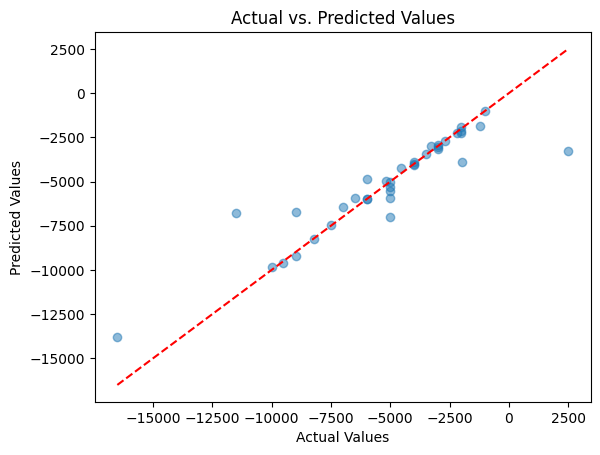

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already trained your XGBoost model and obtained the predicted and actual values
# in the y_pred and y_test arrays, respectively

# Create a scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a diagonal line for reference (indicating perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle='--')

# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Show the plot
plt.show()


In [37]:
import pickle
# Save the trained XGBoost model to a file
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [39]:
# Assuming you have loaded the XGBoost model from a file as shown in the previous responses
import xgboost as xgb
from sklearn.metrics import r2_score

# Load the saved XGBoost model from the file
with open('xgboost_model.pkl', 'rb') as f:
    xgb_model = pickle.load(f)

# Assuming you have new data for prediction stored in a variable named 'X_test'
# Make predictions using the loaded XGBoost model
y_pred = xgb_model.predict(X_test)

# Calculate R2 score for the predicted values
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

R2 score: 0.8154684874634421


In [49]:
# Create an XGBoost regression model
model = xgb.XGBRegressor(learning_rate= 0.1, max_depth= 3, n_estimators= 300)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate and print the R2 score on the test data
r2 = r2_score(y_test, y_pred)
print('Test R2 score:', r2)

# Perform 5-fold cross-validation with R2 score as the scoring metric
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the cross-validation R2 scores
print('Cross-validation R2 scores:', scores)

# Print the average and standard deviation of the cross-validation R2 scores
print('Average cross-validation R2:', scores.mean())
print('Standard deviation of cross-validation R2:', scores.std())

Test R2 score: 0.8154684874634421
Cross-validation R2 scores: [0.81234932 0.83428997 0.6587981  0.72078055 0.7790086 ]
Average cross-validation R2: 0.761045307552964
Standard deviation of cross-validation R2: 0.06386752457934303


In [48]:
# Create an XGBoost regression model
model = xgb.XGBRegressor(learning_rate= 0.1, max_depth= 3, n_estimators= 300, reg_alpha=0.5)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate and print the R2 score on the test data
r2 = r2_score(y_test, y_pred)
print('Test R2 score:', r2)

# Perform 5-fold cross-validation with R2 score as the scoring metric
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the cross-validation R2 scores
print('Cross-validation R2 scores:', scores)

# Print the average and standard deviation of the cross-validation R2 scores
print('Average cross-validation R2:', scores.mean())
print('Standard deviation of cross-validation R2:', scores.std())

Test R2 score: 0.8174494736891416
Cross-validation R2 scores: [0.81104504 0.83592525 0.65383054 0.71825068 0.7795456 ]
Average cross-validation R2: 0.7597194236494651
Standard deviation of cross-validation R2: 0.06598005166556094


In [45]:
from sklearn.linear_model import Lasso, Ridge

# Create a Lasso regularization model
lasso_model = Lasso(alpha=0.1)  # alpha is the regularization strength

# Create a Ridge regularization model
ridge_model = Ridge(alpha=0.1)  # alpha is the regularization strength

# Fit the Lasso model to the training data
lasso_model.fit(X_train, y_train)

# Fit the Ridge model to the training data
ridge_model.fit(X_train, y_train)

# Predict on the test data using the Lasso model
y_pred_lasso = lasso_model.predict(X_test)

# Predict on the test data using the Ridge model
y_pred_ridge = ridge_model.predict(X_test)

# Calculate the R2 score for Lasso and Ridge models
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)

print('Lasso R2 score:', r2_lasso)
print('Ridge R2 score:', r2_ridge)


/opt/homebrew/Caskroom/miniforge/base/envs/watchprice/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.388e+06, tolerance: 1.287e+05
  model = cd_fast.enet_coordinate_descent(


Lasso R2 score: 0.9181479847507026
Ridge R2 score: 0.7330152190958015
